# Petroleum Products Consumption EDA & Prediction🛢️⛽📊

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('consumption_data.csv')
df.head()

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date
0,August,2023,ATF,676.75,2024-01-03
1,July,2023,ATF,663.23,2024-01-03
2,June,2023,ATF,642.33,2024-01-03
3,May,2023,ATF,670.58,2024-01-03
4,April,2023,ATF,655.98,2024-01-03


## Data Preprocessing

In [3]:
df.describe()

,Year,Quantity (000 Metric Tonnes)
count,492.000000,492.000000
mean,2021.463415,1453.350244
std,1.039291,1790.256405
min,2020.000000,23.240000
25%,2021.000000,362.070000
50%,2021.000000,858.270000
75%,2022.000000,1967.875000
max,2023.000000,8217.120000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         492 non-null    object 
 1   Year                          492 non-null    int64  
 2   PRODUCTS                      492 non-null    object 
 3   Quantity (000 Metric Tonnes)  492 non-null    float64
 4   updated_date                  492 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.3+ KB


Data contains no null values

In [5]:
df.shape

(492, 5)

Dataset contains 492 rows and 5 columns.

In [6]:
# Renaming Columns
df.rename({'Quantity (000 Metric Tonnes)':'Quantity','PRODUCTS':'Products'},axis=1,inplace=True)

removing updated_date column, as it is not useful for us.

In [7]:
df['updated_date']

0      2024-01-03
1      2024-01-03
2      2024-01-03
3      2024-01-03
4      2024-01-03
          ...    
487    2024-01-03
488    2024-01-03
489    2024-01-03
490    2024-01-03
491    2024-01-03
Name: updated_date, Length: 492, dtype: object

In [8]:
df.drop(columns=['updated_date'],inplace=True,axis=1)

#### Validating Column Values

In [9]:
df["Month"].unique()

array(['August', 'July', 'June', 'May', 'April', 'March', 'February',
       'January', 'December', 'November', 'October', 'September'],
      dtype=object)

In [10]:
# Various products/by-products in production
df["Products"].unique()

array(['ATF', 'Bitumen', 'FO & LSHS', 'HSD', 'LDO', 'LPG',
       'Lubricants & Greases', 'MS', 'Naphtha', 'Others',
       'Petroleum coke', 'SKO'], dtype=object)

In [11]:
df["Year"].unique()

array([2023, 2022, 2021, 2020], dtype=int64)

data consists from year 2020 to 2021

## Exploratory Data Analysis(EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Average Production per year

<AxesSubplot:xlabel='Year', ylabel='Quantity'>

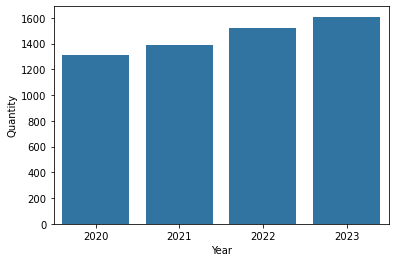

In [13]:
#Average production per year
avg_prod = df.groupby("Year")["Quantity"].mean()
avg_prod = pd.DataFrame(avg_prod)
sns.barplot(avg_prod,x='Year',y='Quantity')

Inference: Average production of petroleum products are increasing year by year. 

### Total Production for each Product(2020-2023)

[Text(0, 0, '19393.9'),
 Text(0, 0, '26891.3'),
 Text(0, 0, '21576.1'),
 Text(0, 0, '272769'),
 Text(0, 0, '2933.25'),
 Text(0, 0, '95899.6'),
 Text(0, 0, '14025.9'),
 Text(0, 0, '109250'),
 Text(0, 0, '45048.9'),
 Text(0, 0, '46845.3'),
 Text(0, 0, '56409.5'),
 Text(0, 0, '4005.79')]

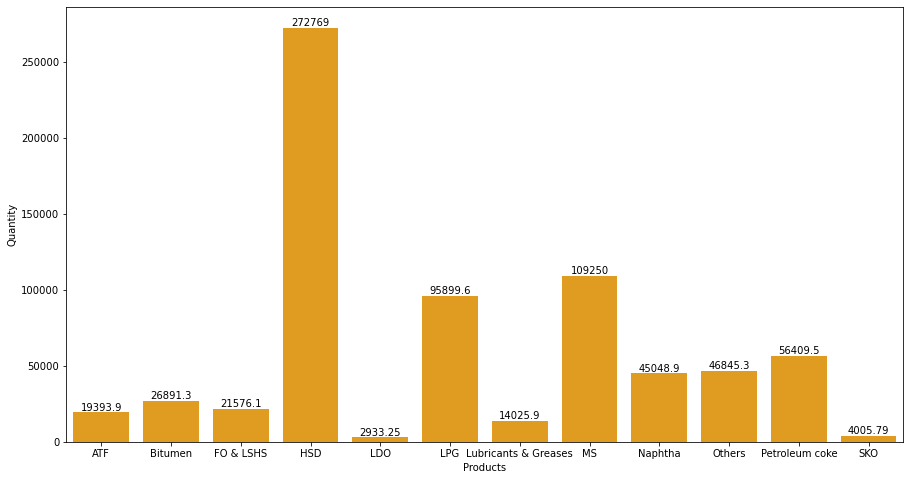

In [14]:
tot_prod = df.groupby('Products')["Quantity"].sum()
tot_prod = pd.DataFrame(tot_prod)
plt.figure(figsize=(15,8))
ax = sns.barplot(tot_prod,x='Products',y='Quantity',color='orange')
ax.bar_label(ax.containers[0])

High Speed Diesel (HSD) is highest in production(272769 MT).

 ## Modeling

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,precision_score

In [16]:
le = LabelEncoder() #Month
le_1 = LabelEncoder() #Products
df["Month"] = le.fit_transform(df["Month"])
df["Products"] = le_1.fit_transform(df["Products"])

In [50]:
Q1 = df["Quantity"].quantile(0.25)
Q3 = df["Quantity"].quantile(0.75)
IQR = Q3-Q1
outlier = df[((df["Quantity"]<Q1-1.5*IQR)|(df["Quantity"]>Q3+1.5*IQR))]
df.drop(outlier.index,inplace=True)

<AxesSubplot:>

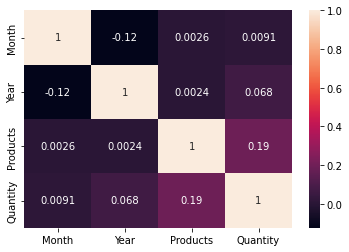

In [51]:
sns.heatmap(df.corr(),annot=True)

In [52]:
le.classes_

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [53]:
le_1.classes_

array(['ATF', 'Bitumen', 'FO & LSHS', 'HSD', 'LDO', 'LPG',
       'Lubricants & Greases', 'MS', 'Naphtha', 'Others',
       'Petroleum coke', 'SKO'], dtype=object)

In [54]:
df["Products"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [55]:
df["Month"].unique()

array([ 1,  5,  6,  8,  0,  7,  3,  4,  2,  9, 10, 11])

In [56]:
# mm = MinMaxScaler()
# df["Year"] = mm.fit_transform(df[["Year"]])
# df["Quantity"] = mm.fit_transform(df[["Quantity"]])


In [57]:
x = df.iloc[:,:3]
y = df["Quantity"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=1)

In [68]:
# #LinearRegression
# lr = LinearRegression()
# lr.fit(xtrain,ytrain)
# ypred = lr.predict(xtest)
# r2_score(ypred,ytest)

-15.681203224129973

-0.024618932714632447

In [59]:
#RFR
rfr = RandomForestRegressor(random_state=1,n_estimators=5)
rfr.fit(xtrain,ytrain)
ypred = rfr.predict(xtest)
r2_score(ytest,ypred)

0.9131308963441613

In [60]:
rfr.score(xtest,ytest)

0.9131308963441613

In [61]:
rfr.score(xtrain,ytrain)

0.9754354221066412

In [62]:
#SVM
from sklearn.svm import SVR 
svr = SVR(kernel='rbf')
svr.fit(xtrain,ytrain)
ypred = svr.predict(xtest)
r2_score(ytest,ypred)

-0.09422488107768356

In [65]:
rfr.predict([[le.transform(['January'])[0],2028,le_1.transform(['ATF'])[0]]])

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([667.84])

In [70]:
lr.predict([[le.transform(['January'])[0],2029,le_1.transform(['ATF'])[0]]])

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1159.1770442])

In [75]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
# Fitting the model 
xgb_r.fit(xtrain, ytrain) 
ypred = xgb_r.predict(xtest)
r2_score(ytest,ypred)

C:\Users\andre\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [09:23:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.9244903491738438

In [82]:
xgb_r.predict([[le.transform(['February'])[0],2025,le_1.transform(['ATF'])[0]]])

array([667.16785], dtype=float32)